In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("../../datasets/aggregated-analytics.csv")

y = df["target"]
x = df.drop("target", axis=1)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=25
)

In [ ]:
# TODO: testar com árvore

scores = {}

for i in range(1, 20 + 1):
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(x_train, y_train)
    scores[i] = KNN_model.score(x_test, y_test)

Text(0, 0.5, 'Acurácia')

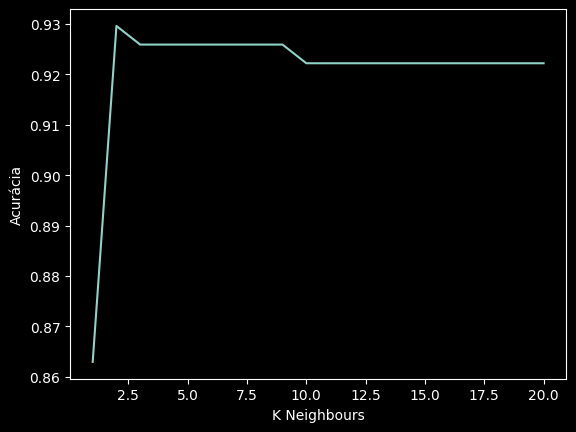

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(scores)
plt.xlabel("K Neighbours")
plt.ylabel("Acurácia")

<Axes: xlabel='education', ylabel='target'>

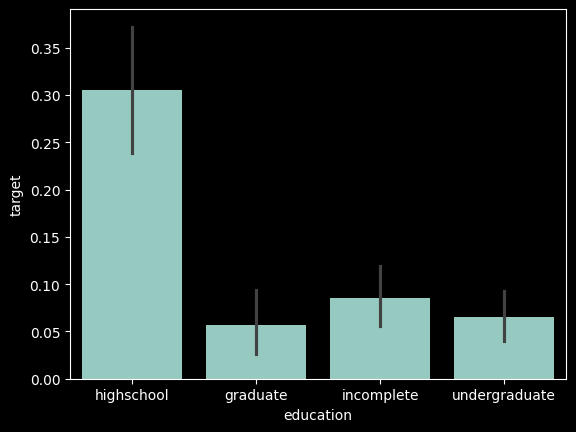

In [10]:
from preprocessing import aggregate_analytics_data


df_web = pd.read_csv("../../datasets/bv-web-analytics-associated.csv")
df_users = pd.read_csv("../../datasets/bv-profiles.csv")

df_agg = aggregate_analytics_data(df_web)

df = df_agg.merge(df_users, how="inner", on="email")
df["target"] = ~df["purchases"].isna()

sns.barplot(df, x="education", y="target")